In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import pandas as pd

from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from modules.agents import TDAgent
from modules.environments import GridWorld

## Agents Comparison

In [ ]:
SALIENCE_FACTOR = 1.5
DOPAMINE_ALTERATION = 0.5

SIM_SUMMARIES = []
MAX_ITER = 100
MAX_STEPS = 1000

for world in ['treasure_island', 'grid', 'wall', 'double_wall', 'maze', 'tbone']:
    
    print(f'Testing {world}')
    
    normal_agent = TDAgent(
        world=GridWorld(file_path=f'grid_worlds//the_{world}.txt'),
        agent_tag=f'normal_the_{world}'
    )
    addicted_agent = TDAgent(
        world=GridWorld(file_path=f'grid_worlds//the_{world}.txt'),
        agent_tag=f'addicted_the_{world}',
        salience_factor=SALIENCE_FACTOR
    )
    depleted_agent = TDAgent(
        world=GridWorld(file_path=f'grid_worlds//the_{world}.txt'),
        agent_tag=f'depleted_the_{world}',
        dopamine_alteration=DOPAMINE_ALTERATION
    )
    
    for agent in tqdm([normal_agent, addicted_agent, depleted_agent]):
        
        sim_summary = agent.simulate(
            max_iter=MAX_ITER, 
            verbose=10,
            max_steps=MAX_STEPS
        )
        for metric in ['steps', 'reward', 'error']:
            
            sim_summary[metric] = sim_summary[metric].astype('float')
            sim_summary[f'smooth_{metric}'] = sim_summary[metric].rolling(
                window=max(30, MAX_ITER // 10), 
                min_periods=1
            ).mean()
        
        sim_summary['world'] = world
        sim_summary['agent'] = agent.agent_tag.split('_')[0]
        SIM_SUMMARIES.append(sim_summary)
        
SIM_SUMMARIES = pd.concat(SIM_SUMMARIES, ignore_index=True)

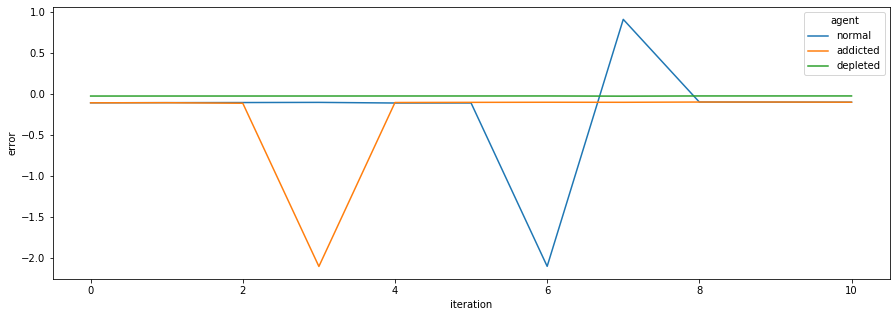

In [18]:
plt.figure(figsize=(15, 5))

sns.lineplot(
    x='iteration',
    y='error',
    hue='agent',
    data=sim_summaries[sim_summaries['world'] == 'wall']
)